## Naive Bayes Model

Accuracy: 0.2220294882914137
Confusion Matrix:
 [[148  98 147 175 149  44 199]
 [  7  23  15  23  18   4  21]
 [156 106 160 168 162  57 209]
 [230 155 242 576 317  87 218]
 [ 92 122 130 224 350  61 237]
 [151 121 157 195 213  98 204]
 [ 59  66 115 118 116  34 289]]
Classification Report:
               precision    recall  f1-score   support

       angry       0.18      0.15      0.16       960
     disgust       0.03      0.21      0.06       111
        fear       0.17      0.16      0.16      1018
       happy       0.39      0.32      0.35      1825
     neutral       0.26      0.29      0.28      1216
         sad       0.25      0.09      0.13      1139
    surprise       0.21      0.36      0.27       797

    accuracy                           0.23      7066
   macro avg       0.21      0.22      0.20      7066
weighted avg       0.26      0.23      0.23      7066



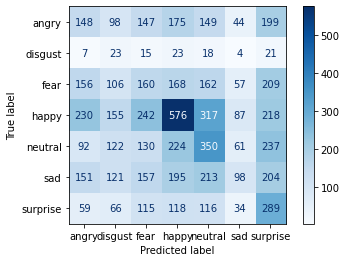

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

X_train = []
y_train = []

# Load training data
for emotion in emotions:
    folder = '../datasets/train/' + emotion + '/'
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        # Convert image to grayscale and resize
        img = img.convert('L').resize((100, 100))
        # Convert image to numpy array
        img_array = np.array(img)
        # Flatten array
        img_vector = img_array.flatten()
        X_train.append(img_vector)
        y_train.append(emotions.index(emotion))

X_train = np.array(X_train)
y_train = np.array(y_train)

# Load validation data
X_val = []
y_val = []

for emotion in emotions:
    folder = '../datasets/validation/' + emotion + '/'
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        # Convert image to grayscale and resize
        img = img.convert('L').resize((100, 100))
        # Convert image to numpy array
        img_array = np.array(img)
        # Flatten array
        img_vector = img_array.flatten()
        X_val.append(img_vector)
        y_val.append(emotions.index(emotion))

X_val = np.array(X_val)
y_val = np.array(y_val)

# Split training data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Implement Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict the emotions of the validation set
y_pred = nb.predict(X_val)

# Calculate the accuracy of the model
accuracy = nb.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate the confusion matrix and classification report
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)

plot_confusion_matrix(nb, X_val, y_val, display_labels=emotions, cmap=plt.cm.Blues)

cr = classification_report(y_val, y_pred, target_names=emotions)
print("Classification Report:\n", cr)

## Logistic Regression Model

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from PIL import Image
import os

# Define the emotions and their corresponding labels
emotions = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

# Define the paths to the training and validation directories
train_dir = '../datasets/train/'
val_dir = '../datasets/validation/'

# Define the image size
img_size = (48, 48)

# Load the training data
X_train = []
y_train = []
for emotion, label in emotions.items():
    for filename in os.listdir(train_dir + emotion):
        img = Image.open(train_dir + emotion + '/' + filename)
        img = img.resize(img_size)
        X_train.append(np.array(img).flatten())
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Load the validation data
X_val = []
y_val = []
for emotion, label in emotions.items():
    for filename in os.listdir(val_dir + emotion):
        img = Image.open(val_dir + emotion + '/' + filename)
        img = img.resize(img_size)
        X_val.append(np.array(img).flatten())
        y_val.append(label)

X_val = np.array(X_val)
y_val = np.array(y_val)

# Create a logistic regression model
model = LogisticRegression(max_iter=10000, multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix:')
print(cm)

# Calculate the classification report of the model
cr = classification_report(y_val, y_pred, target_names=emotions.keys())
print('Classification report:')
print(cr)


Accuracy: 0.31870931219926407
Confusion matrix:
[[154  36 121 262 130 164  93]
 [ 16  25  11  20  16  13  10]
 [119  31 192 227 151 163 135]
 [157  35 148 964 210 212  99]
 [113  32 111 284 353 198 125]
 [142  45 131 269 194 242 116]
 [ 65  16  88 123  94  89 322]]
Classification report:
              precision    recall  f1-score   support

       angry       0.20      0.16      0.18       960
     disgust       0.11      0.23      0.15       111
        fear       0.24      0.19      0.21      1018
       happy       0.45      0.53      0.49      1825
     neutral       0.31      0.29      0.30      1216
         sad       0.22      0.21      0.22      1139
    surprise       0.36      0.40      0.38       797

    accuracy                           0.32      7066
   macro avg       0.27      0.29      0.27      7066
weighted avg       0.31      0.32      0.31      7066



c:\Users\65818\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Adaboost Classifier

Accuracy: 0.33682422870082085
Confusion matrix:
[[  70   13   42  404  188  155   88]
 [   3    4    6   51   15   15   17]
 [  54   11   66  391  170  153  173]
 [  40   13   49 1188  216  188  131]
 [  39   16   32  452  411  166  100]
 [  55   16   48  423  225  277   95]
 [  19    5   50  179  113   67  364]]
Classification report:
              precision    recall  f1-score   support

       angry       0.25      0.07      0.11       960
     disgust       0.05      0.04      0.04       111
        fear       0.23      0.06      0.10      1018
       happy       0.38      0.65      0.48      1825
     neutral       0.31      0.34      0.32      1216
         sad       0.27      0.24      0.26      1139
    surprise       0.38      0.46      0.41       797

    accuracy                           0.34      7066
   macro avg       0.27      0.27      0.25      7066
weighted avg       0.31      0.34      0.30      7066



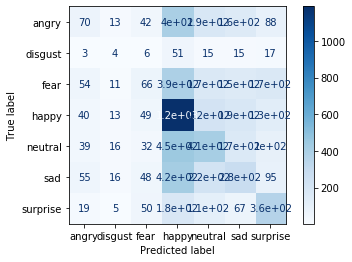

In [3]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define the emotions and their corresponding labels
emotions = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

# Define the paths to the training and validation directories
train_dir = '../datasets/train/'
val_dir = '../datasets/validation/'

# Define the image size
img_size = (48, 48)

# Load the training data
X_train = []
y_train = []
for emotion, label in emotions.items():
    for filename in os.listdir(train_dir + emotion):
        img = Image.open(train_dir + emotion + '/' + filename)
        img = img.resize(img_size)
        X_train.append(np.array(img).flatten())
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Load the validation data
X_val = []
y_val = []
for emotion, label in emotions.items():
    for filename in os.listdir(val_dir + emotion):
        img = Image.open(val_dir + emotion + '/' + filename)
        img = img.resize(img_size)
        X_val.append(np.array(img).flatten())
        y_val.append(label)

X_val = np.array(X_val)
y_val = np.array(y_val)

# Create a logistic regression model
model = AdaBoostClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix:')
print(cm)

plot_confusion_matrix(model, X_val, y_val, display_labels=emotions, cmap=plt.cm.Blues)

# Calculate the classification report of the model
cr = classification_report(y_val, y_pred, target_names=emotions.keys())
print('Classification report:')
print(cr)